# About the dataset

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

source - https://www.kaggle.com/gilsousa/habermans-survival-data-set


# Objective

With the help of exploretory data analysis, find out the feature(s) which will help in predicting whether patients has survived or deceasesd.




Lets load the dataset ...

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_patients = pd.read_csv("./dataset/haberman.csv")

In [3]:
print(df_patients.head())

print(df_patients.shape)

   30  64   1  1.1
0  30  62   3    1
1  30  65   0    1
2  31  59   2    1
3  31  65   4    1
4  33  58  10    1
(305, 4)


Not sure what these columns are!! Bit of crawling on comment section Assignment, providesd info about columns, here are those. This is from AppliedAi team itself, so I am banking on it.

1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical)  --> A positive axillary node is a lymph node in the area of the armpit (axilla) to which cancer has spread. This spread is determined by surgically removing some of the lymph nodes and examining them under a microscope to see whether cancer cells are present.
4. Survival status (class attribute) 
          -- 1 = the patient survived 5 years or longer 
          -- 2 = the patient died within 5 year

Refer here - https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2828/assignment-1-data-visualization-with-haberman-dataset/2/module-2-data-science-exploratory-data-analysis-and-data-visualization


In [4]:
# For better understanding, going to rename columns accordingly

df_patients = df_patients.rename(columns={'30':'AGE','64':'YEAR_OF_OPERATION','1':'AFFECTED_AUX_NODE','1.1':'SURVIVED'})

In [5]:
df_patients

# This looks better explaning about variable

,AGE,YEAR_OF_OPERATION,AFFECTED_AUX_NODE,SURVIVED
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [6]:
df_patients['SURVIVED'].value_counts()

# This is imbalanced dataset, as majority of patients has survived.

1    224
2     81
Name: SURVIVED, dtype: int64

In [7]:
# Lets see if dataset is having null values

df_patients.isnull()

,AGE,YEAR_OF_OPERATION,AFFECTED_AUX_NODE,SURVIVED
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
300,False,False,False,False
301,False,False,False,False
302,False,False,False,False
303,False,False,False,False


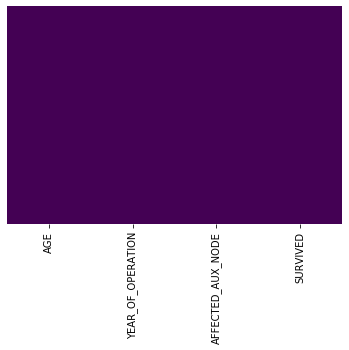

In [8]:
# isnull() tells us if columns has null or not. But its not posible to scroll whole dataset and verify..right!

# Seaborn heatmap can help here, in plotting a heat map of value 'True' as yellow line in below graph

sns.heatmap(df_patients.isnull(), yticklabels=False, cbar=False, cmap="viridis")

# Since there is no lines, meaning there is no 'True' value in isnull(), meaning this dataset doen't have missing or null value.

## Observations so far...

1. There are 3 independent feature in this dataset - Age, Year of operation and Affected Auxiliory Node
2. There is one dependent feature - Survived
3. Its a impalanced dataset.
4. Shape - (305, 4)
5. Dataset doesn't have missing or null values. 

## Revisiting obejective 

So, we need to findout among - Age, Year of operation, and Affected Auxiliory Node independent features, which is/are better helpful in classifying patient survival


### Lets scatter plot this dataset ...

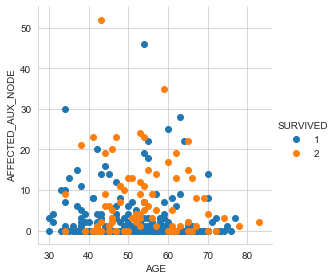

In [33]:
sns.set_style("whitegrid");
sns.FacetGrid(df_patients, hue="SURVIVED", height=4) \
   .map(plt.scatter, "AGE", "AFFECTED_AUX_NODE") \
   .add_legend();
plt.show();

### Observation
1. Dataploting is mixed here, so based on Age and Affected node it is difficult to classify survival or death

## Pair plot 

Trying pair plot so that can see correlation between all variables

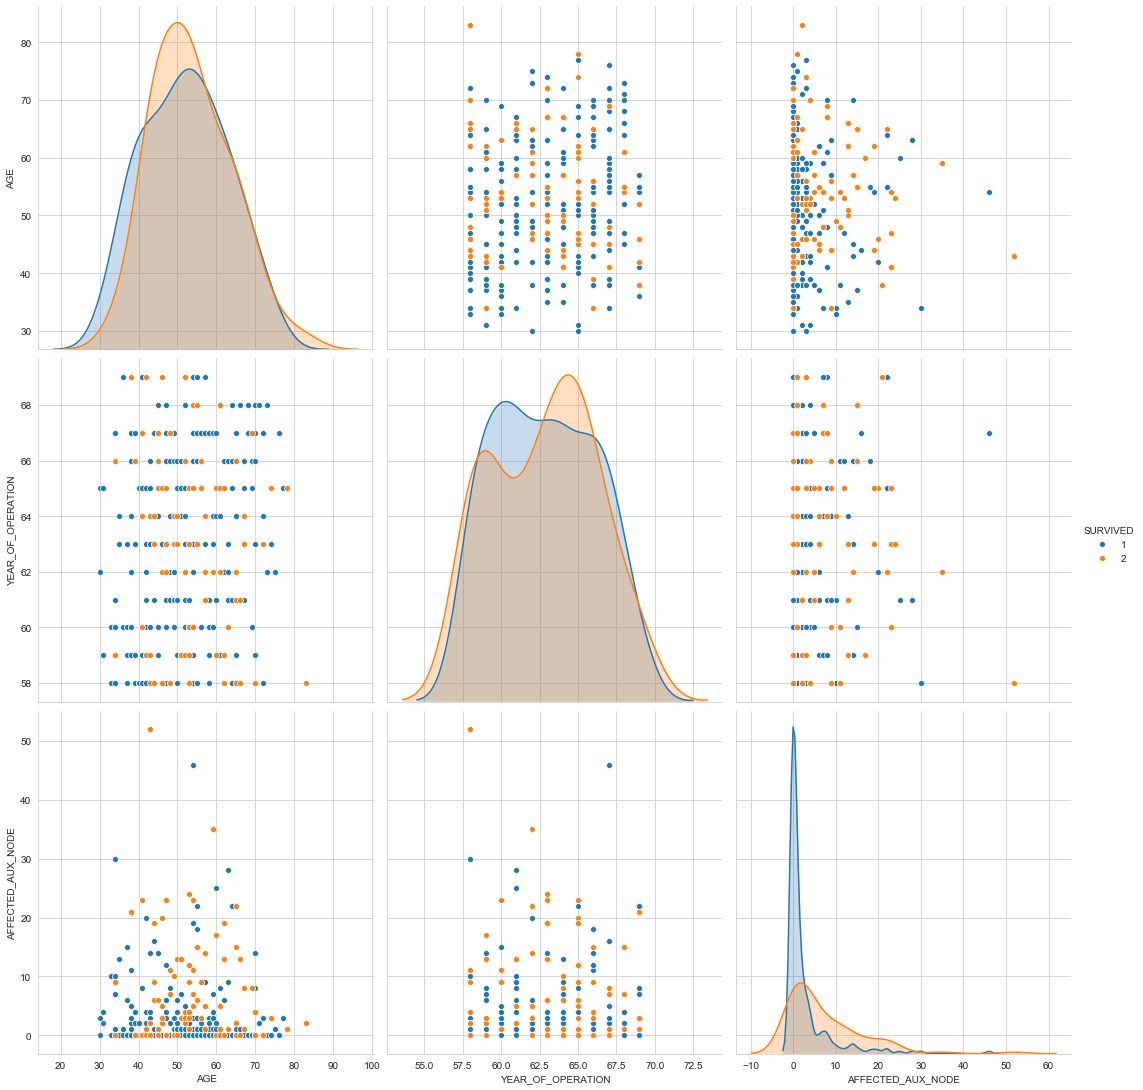

In [15]:
sns.set_style('whitegrid')

sns.pairplot(df_patients, hue='SURVIVED', height=5)
#plt.show()

### Observation

None of the 2 features are correlated

## Histograms and density functions

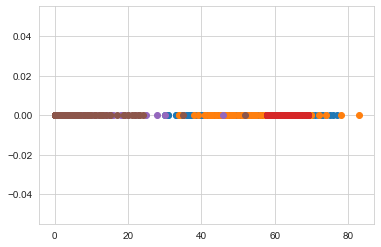

In [27]:
import numpy as np
patient_survived = df_patients.loc[df_patients["SURVIVED"] == 1];
patient_not_survived = df_patients.loc[df_patients["SURVIVED"] == 2];

plt.plot(patient_survived["AGE"], np.zeros_like(patient_survived['AGE']), 'o')
plt.plot(patient_not_survived["AGE"], np.zeros_like(patient_not_survived['AGE']), 'o')

plt.plot(patient_survived["YEAR_OF_OPERATION"], np.zeros_like(patient_survived['YEAR_OF_OPERATION']), 'o')
plt.plot(patient_not_survived["YEAR_OF_OPERATION"], np.zeros_like(patient_not_survived['YEAR_OF_OPERATION']), 'o')


plt.plot(patient_survived["AFFECTED_AUX_NODE"], np.zeros_like(patient_survived['AFFECTED_AUX_NODE']), 'o')
plt.plot(patient_not_survived["AFFECTED_AUX_NODE"], np.zeros_like(patient_not_survived['AFFECTED_AUX_NODE']), 'o')

plt.show()



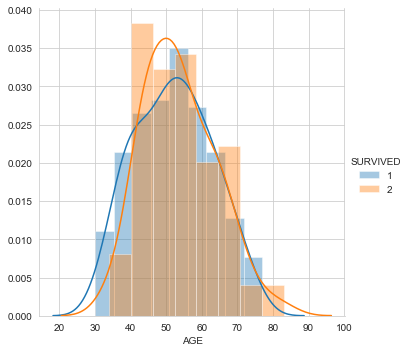

In [28]:
sns.FacetGrid(df_patients, hue="SURVIVED", height=5) \
   .map(sns.distplot, "AGE") \
   .add_legend();
plt.show();

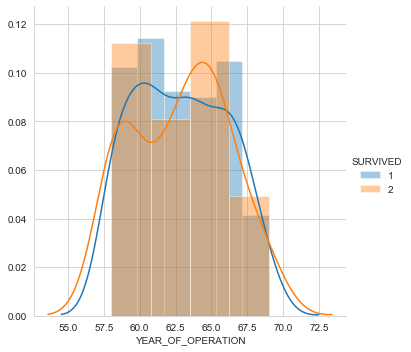

In [30]:
sns.FacetGrid(df_patients, hue="SURVIVED", height=5) \
   .map(sns.distplot, "YEAR_OF_OPERATION") \
   .add_legend();
plt.show();

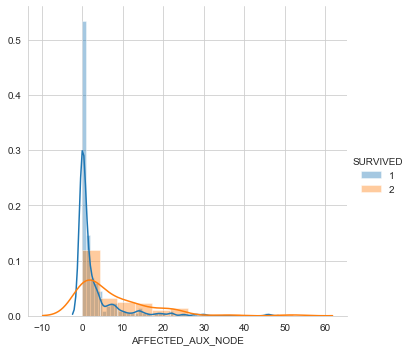

In [32]:
sns.FacetGrid(df_patients, hue="SURVIVED", height=5) \
   .map(sns.distplot, "AFFECTED_AUX_NODE") \
   .add_legend();
plt.show();

## Observation

1. With AFFECTED_AUX_NODE distribution can say that, survival rate is correalated to Affected Aux Node. The more number of affected aux node, patients has less chance of survival

2. But, still not clear with what percentage of survival/death rate corresponding to number of affected aux node. 
3. Lets use CDF w.r.t. PDF 

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


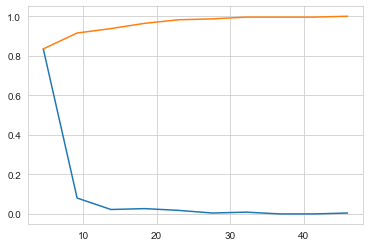

In [41]:
df_patient_survived = df_patients.loc[df_patients["SURVIVED"] == 1];
df_patient_not_survived = df_patients.loc[df_patients["SURVIVED"] == 2];

counts, bin_edges = np.histogram(df_patient_survived['AFFECTED_AUX_NODE'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


## Observation on survived patients w.r.t. affected aux node

1. 


[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


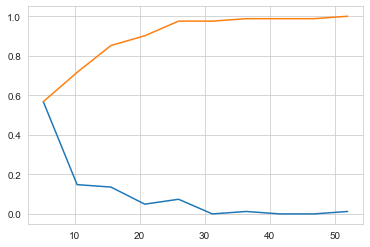

In [42]:
counts, bin_edges = np.histogram(df_patient_not_survived['AFFECTED_AUX_NODE'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)